<a href="https://www.kaggle.com/code/kursatdinc/advanced-feature-engineering-titanic?scriptVersionId=184739010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic End-to-End Feature Engineering & Data Preprocessing

>#  Importings 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

> # Load Dataset 

In [2]:
def load():
    data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
    return data

In [3]:
df = load()
df.columns = [col.upper() for col in df.columns]

df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> # Overview & Preprocessing

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df, head=10)

##################### Shape #####################
(891, 12)
##################### Types #####################
PASSENGERID      int64
SURVIVED         int64
PCLASS           int64
NAME            object
SEX             object
AGE            float64
SIBSP            int64
PARCH            int64
TICKET          object
FARE           float64
CABIN           object
EMBARKED        object
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
PASSENGERID      0
SURVIVED         0
PCLASS           0
NAME             0
SEX              0
AGE            177
SIBSP            0
PARCH            0
TICKET           0
FARE             0
CABIN          687
EMBARKED         2
dtype: int64
##################### Quantiles #####################
             count        mean         std   min    0%      5%       50%  \
PASSENGERID  891.0  446.000000  257.353842  1.00  1.00  45.500  446.0000   
SURVIVED     891.0    0.383838

> # Feature Engineering

In [6]:
# Generating New Variables

# Cabin Bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype("int")

# Name Count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

# Name Word Count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

# Name Dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

# Name Title
df["NEW_TITLE"] = df.NAME.str.extract(" ([A-Za-z]+)\.", expand=False)

# Family Size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

# Age_Pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

# Is Alone
df.loc[((df["SIBSP"] + df["PARCH"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SIBSP"] + df["PARCH"]) == 0), "NEW_IS_ALONE"] = "YES"

# Age Level
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

# Sex x Age
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniorfemale"

df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,...,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,51,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,4,0,Mr,1,105.0,YES,mature,maturemale


In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

print("#############")

print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8
#############
Cat_Cols : ['SEX', 'EMBARKED', 'NEW_TITLE', 'NEW_IS_ALONE', 'NEW_AGE_CAT', 'NEW_SEX_CAT', 'SURVIVED', 'PCLASS', 'SIBSP', 'PARCH', 'NEW_CABIN_BOOL', 'NEW_NAME_WORD_COUNT', 'NEW_NAME_DR', 'NEW_FAMILY_SIZE']
#############
Num_Cols : ['PASSENGERID', 'AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']
#############
Cat_But_Car : ['NAME', 'TICKET', 'CABIN']


In [9]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

print(f"Num_Cols : {num_cols}")

Num_Cols : ['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']


> # Outliers

In [10]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [11]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [12]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [13]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


> # Missing Values

In [14]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [15]:
missing_values_table(df)

                n_miss  ratio
CABIN              687  77.10
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22


In [16]:
df.groupby("NEW_TITLE").agg({"AGE" : "median"})

,AGE
NEW_TITLE,
Capt,64.8125
Col,58.0000
Countess,33.0000
Don,40.0000
Dr,46.5000
Jonkheer,38.0000
Lady,48.0000
Major,48.5000
Master,3.5000


In [17]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

# Age Level
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

# Sex x Age
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] < 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] >= 50), "NEW_SEX_CAT"] = "seniorfemale"

In [18]:
df.drop("CABIN", inplace=True, axis=1)

remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,male,22.0,1,0,7.2500,S,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,female,38.0,1,0,65.6344,C,1,45,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,female,26.0,0,0,7.9250,S,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,female,35.0,1,0,53.1000,S,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,male,35.0,0,0,8.0500,S,0,24,4,0,Mr,1,105.0,YES,mature,maturemale


> # Label Encoding

In [19]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [20]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,1,22.0,1,0,7.2500,S,0,23,4,0,Mr,2,66.0,0,mature,maturemale
1,2,1,1,0,38.0,1,0,65.6344,C,1,45,7,0,Mrs,2,38.0,0,mature,maturefemale
2,3,1,3,0,26.0,0,0,7.9250,S,0,22,3,0,Miss,1,78.0,1,mature,maturefemale
3,4,1,1,0,35.0,1,0,53.1000,S,1,44,7,0,Mrs,2,35.0,0,mature,maturefemale
4,5,0,3,1,35.0,0,0,8.0500,S,0,24,4,0,Mr,1,105.0,1,mature,maturemale


> # Rare Encoding

In [21]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

def rare_encoder(dataframe, rare_perc, cat_cols):

    # Correction if there is more than 1 rare. status considered.
    # After the rare class query is made according to 0.01, the sum of the incoming true's is taken.
    # If it is greater than 1, it is taken to the rare cols list.

    rare_columns = [col for col in cat_cols if (dataframe[col].value_counts() / len(dataframe) < 0.01).sum() > 1]

    for col in rare_columns:
        tmp = dataframe[col].value_counts() / len(dataframe)
        rare_labels = tmp[tmp < rare_perc].index
        dataframe[col] = np.where(dataframe[col].isin(rare_labels), "Rare", dataframe[col])

    return dataframe

In [22]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
     COUNT     RATIO  TARGET_MEAN
SEX                              
0      314  0.352413     0.742038
1      577  0.647587     0.188908


EMBARKED : 3
          COUNT     RATIO  TARGET_MEAN
EMBARKED                              
C           168  0.188552     0.553571
Q            77  0.086420     0.389610
S           646  0.725028     0.339009


NEW_TITLE : 17
           COUNT     RATIO  TARGET_MEAN
NEW_TITLE                              
Capt           1  0.001122     0.000000
Col            2  0.002245     0.500000
Countess       1  0.001122     1.000000
Don            1  0.001122     0.000000
Dr             7  0.007856     0.428571
Jonkheer       1  0.001122     0.000000
Lady           1  0.001122     1.000000
Major          2  0.002245     0.500000
Master        40  0.044893     0.575000
Miss         182  0.204265     0.697802
Mlle           2  0.002245     1.000000
Mme            1  0.001122     1.000000
Mr           517  0.580247     0.156673
Mrs          125  0.140292   

In [23]:
df = rare_encoder(df, 0.01, cat_cols)

#Example
df["NEW_TITLE"].value_counts()

NEW_TITLE
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

> # One-Hot Encoding

In [24]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [25]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_Rare,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.0,7.2500,0,23,0,66.0,0,...,False,True,False,False,False,True,False,False,False,False
1,2,1,0,38.0,65.6344,1,45,0,38.0,0,...,False,True,False,False,True,False,False,False,False,False
2,3,1,0,26.0,7.9250,0,22,0,78.0,1,...,False,True,False,False,True,False,False,False,False,False
3,4,1,0,35.0,53.1000,1,44,0,35.0,0,...,False,True,False,False,True,False,False,False,False,False
4,5,0,1,35.0,8.0500,0,24,0,105.0,1,...,False,True,False,False,False,True,False,False,False,False


In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "PASSENGERID" not in col]

rare_analyser(df, "SURVIVED", cat_cols)

Observations: 891
Variables: 55
cat_cols: 50
num_cols: 5
cat_but_car: 0
num_but_cat: 50
SURVIVED : 2
          COUNT     RATIO  TARGET_MEAN
SURVIVED                              
0           549  0.616162          0.0
1           342  0.383838          1.0


SEX : 2
     COUNT     RATIO  TARGET_MEAN
SEX                              
0      314  0.352413     0.742038
1      577  0.647587     0.188908


NEW_CABIN_BOOL : 2
                COUNT     RATIO  TARGET_MEAN
NEW_CABIN_BOOL                              
0                 687  0.771044     0.299854
1                 204  0.228956     0.666667


NEW_NAME_DR : 2
             COUNT     RATIO  TARGET_MEAN
NEW_NAME_DR                              
0              881  0.988777      0.38252
1               10  0.011223      0.50000


NEW_IS_ALONE : 2
              COUNT     RATIO  TARGET_MEAN
NEW_IS_ALONE                              
0               354  0.397306     0.505650
1               537  0.602694     0.303538


PCLASS_1 : 2
    

In [27]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.015).any(axis=None)]

useless_cols

['NEW_NAME_DR',
 'SIBSP_Rare',
 'NEW_NAME_WORD_COUNT_8',
 'NEW_NAME_WORD_COUNT_Rare',
 'NEW_FAMILY_SIZE_7',
 'NEW_FAMILY_SIZE_Rare']

In [28]:
df.drop(useless_cols, axis=1, inplace=True)

df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_1,...,NEW_FAMILY_SIZE_6,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.0,7.2500,0,23,66.0,0,False,...,False,True,False,False,False,True,False,False,False,False
1,2,1,0,38.0,65.6344,1,45,38.0,0,True,...,False,True,False,False,True,False,False,False,False,False
2,3,1,0,26.0,7.9250,0,22,78.0,1,False,...,False,True,False,False,True,False,False,False,False,False
3,4,1,0,35.0,53.1000,1,44,35.0,0,True,...,False,True,False,False,True,False,False,False,False,False
4,5,0,1,35.0,8.0500,0,24,105.0,1,False,...,False,True,False,False,False,True,False,False,False,False


> # Standard Scaler

In [29]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.560638,-0.820552,-0.436675,0.066488
1,0.663302,2.031623,2.248303,-0.790429
2,-0.254653,-0.787578,-0.558720,0.433739
3,0.433813,1.419297,2.126258,-0.882241
4,0.433813,-0.781471,-0.314631,1.260052


In [30]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_1,...,NEW_FAMILY_SIZE_6,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.560638,-0.820552,0,-0.436675,0.066488,0,False,...,False,True,False,False,False,True,False,False,False,False
1,2,1,0,0.663302,2.031623,1,2.248303,-0.790429,0,True,...,False,True,False,False,True,False,False,False,False,False
2,3,1,0,-0.254653,-0.787578,0,-0.558720,0.433739,1,False,...,False,True,False,False,True,False,False,False,False,False
3,4,1,0,0.433813,1.419297,1,2.126258,-0.882241,0,True,...,False,True,False,False,True,False,False,False,False,False
4,5,0,1,0.433813,-0.781471,0,-0.314631,1.260052,1,False,...,False,True,False,False,False,True,False,False,False,False


> # Model

In [31]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_pred, y_test)}")

Accuracy Score : 0.8022388059701493


> # Feature Importance

In [32]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

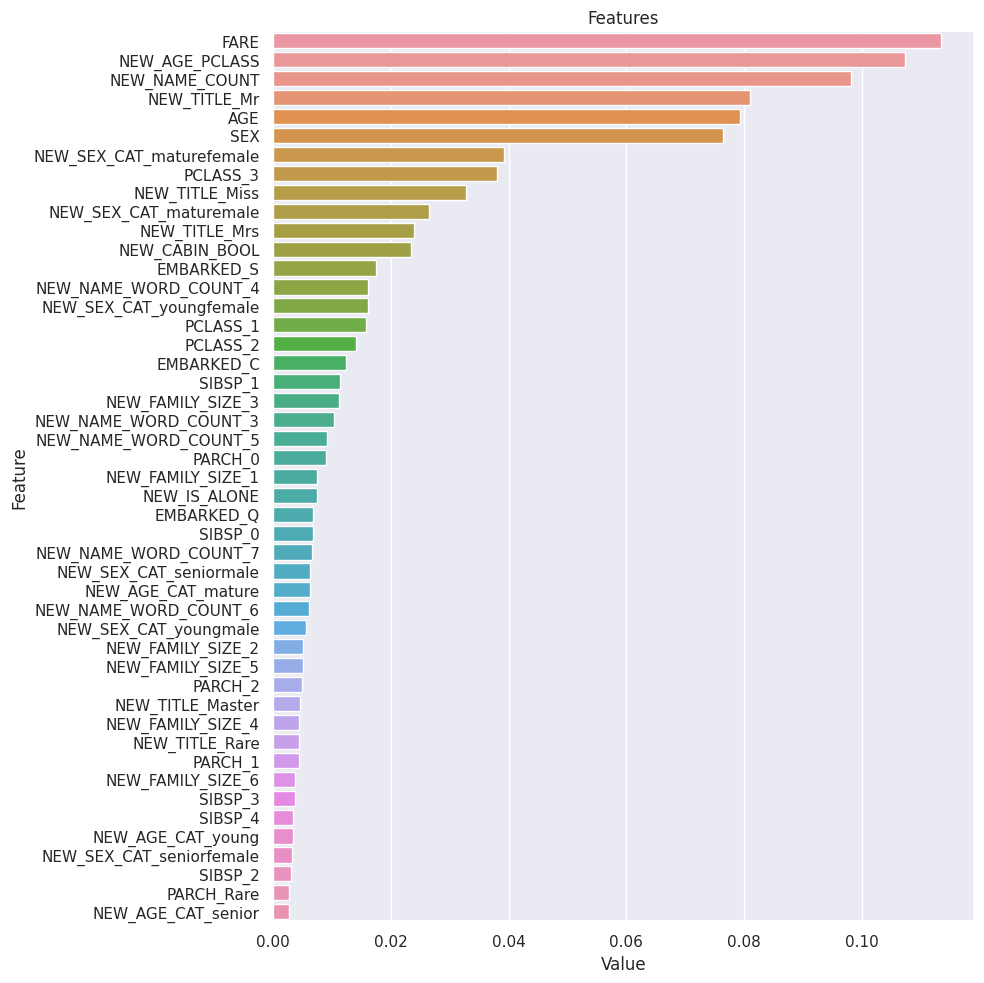

In [33]:
plot_importance(rf_model, X_train, X)